We import the preprocessed data from the previous step as well as some of the packages we need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

We first test several off-the-shelf machine learning algorithms suitable for regression problems through cross validation and select the three top performing for further hyperparameter tuning. We also test a neural network model.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_mean_r2 = np.mean(cross_val_score(knn,X_train,y_train,cv=5))
print('Mean cross validation R-squared for training set:', knn_mean_r2)
knn.fit(X_train, y_train)
knn_rmse_train = mean_squared_error(y_train, knn.predict(X_train), squared=False)
knn_rmse_test = mean_squared_error(y_test, knn.predict(X_test), squared=False)
knn_r2_train = knn.score(X_train, y_train)
knn_r2_test = knn.score(X_test, y_test)
print('RMSE for training set:', knn_rmse_train)
print('RMSE for test set:', knn_rmse_test)
print('R-squared for training set:', knn_r2_train)
print('R-squared for test set:', knn_r2_test)

Mean cross validation R-squared for training set: 0.7821625958561078
RMSE for training set: 94151.59856066148
RMSE for test set: 113925.4493421727
R-squared for training set: 0.862256266475172
R-squared for test set: 0.7934422740486353


In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_mean_r2 = np.mean(cross_val_score(lr,X_train,y_train,cv=5))
print('Mean cross validation R-squared for training set:', lr_mean_r2)
lr.fit(X_train, y_train)
lr_rmse_train = mean_squared_error(y_train, lr.predict(X_train), squared=False)
lr_rmse_test = mean_squared_error(y_test, lr.predict(X_test), squared=False)
lr_r2_train = lr.score(X_train, y_train)
lr_r2_test = lr.score(X_test, y_test)
print('RMSE for training set:', lr_rmse_train)
print('RMSE for test set:', lr_rmse_test)
print('R-squared for training set:', lr_r2_train)
print('R-squared for test set:', lr_r2_test)

Mean cross validation R-squared for training set: -3.7423779285491584e+17
RMSE for training set: 89321.36728857509
RMSE for test set: 172665125205061.25
R-squared for training set: 0.8760269805432656
R-squared for test set: -4.744704820405795e+17


In [5]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_mean_r2 = np.mean(cross_val_score(rf,X_train,y_train,cv=5))
print('Mean cross validation R-squared for training set:', rf_mean_r2)
rf.fit(X_train, y_train)
rf_rmse_train = mean_squared_error(y_train, rf.predict(X_train), squared=False)
rf_rmse_test = mean_squared_error(y_test, rf.predict(X_test), squared=False)
rf_r2_train = rf.score(X_train, y_train)
rf_r2_test = rf.score(X_test, y_test)
print('RMSE for training set:', rf_rmse_train)
print('RMSE for test set:', rf_rmse_test)
print('R-squared for training set:', rf_r2_train)
print('R-squared for test set:', rf_r2_test)

Mean cross validation R-squared for training set: 0.8510171871546209
RMSE for training set: 35956.665192959146
RMSE for test set: 93984.87705410203
R-squared for training set: 0.9799102160401364
R-squared for test set: 0.8594224731565863


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb_mean_r2 = np.mean(cross_val_score(gb,X_train,y_train,cv=5))
print('Mean cross validation R-squared for training set:', gb_mean_r2)
gb.fit(X_train, y_train)
gb_rmse_train = mean_squared_error(y_train, gb.predict(X_train), squared=False)
gb_rmse_test = mean_squared_error(y_test, gb.predict(X_test), squared=False)
gb_r2_train = gb.score(X_train, y_train)
gb_r2_test = gb.score(X_test, y_test)
print('RMSE for training set:', gb_rmse_train)
print('RMSE for test set:', gb_rmse_test)
print('R-squared for training set:', gb_r2_train)
print('R-squared for test set:', gb_r2_test)

Mean cross validation R-squared for training set: 0.8393692473009298
RMSE for training set: 90597.93161031736
RMSE for test set: 99505.01859346945
R-squared for training set: 0.872458059775408
R-squared for test set: 0.8424240574054302


In [7]:
from sklearn.svm import SVR
sv = SVR()
sv_mean_r2 = np.mean(cross_val_score(sv,X_train,y_train,cv=5))
print('Mean cross validation R-squared for training set:', sv_mean_r2)
sv.fit(X_train, y_train)
sv_rmse_train = mean_squared_error(y_train, sv.predict(X_train), squared=False)
sv_rmse_test = mean_squared_error(y_test, sv.predict(X_test), squared=False)
sv_r2_train = sv.score(X_train, y_train)
sv_r2_test = sv.score(X_test, y_test)
print('RMSE for training set:', sv_rmse_train)
print('RMSE for test set:', sv_rmse_test)
print('R-squared for training set:', sv_r2_train)
print('R-squared for test set:', sv_r2_test)

Mean cross validation R-squared for training set: -0.10586910957506132
RMSE for training set: 266760.12510094995
RMSE for test set: 264341.41111253377
R-squared for training set: -0.10575338845966864
R-squared for test set: -0.11206545818424574


In [8]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_mean_r2 = np.mean(cross_val_score(nb,X_train,y_train,cv=5))
print('Mean cross validation R-squared for training set:', nb_mean_r2)
nb.fit(X_train, y_train)
nb_rmse_train = mean_squared_error(y_train, nb.predict(X_train), squared=False)
nb_rmse_test = mean_squared_error(y_test, nb.predict(X_test), squared=False)
nb_r2_train = nb.score(X_train, y_train)
nb_r2_test = nb.score(X_test, y_test)
print('RMSE for training set:', nb_rmse_train)
print('RMSE for test set:', nb_rmse_test)
print('R-squared for training set:', nb_r2_train)
print('R-squared for test set:', nb_r2_test)

Mean cross validation R-squared for training set: 0.004886183587964331
RMSE for training set: 107445.73659680803
RMSE for test set: 166571.91734330176
R-squared for training set: 0.2940994557149926
R-squared for test set: 0.00575139146567718


In [9]:
import tensorflow as tf
def build_regressor(units=32, activation='relu', dropout_rate=0.25, optimizer=tf.keras.optimizers.Adam,\
                    learning_rate=0.001, kernel_initializer=tf.keras.initializers.random_uniform):
    tf.random.set_seed(42)
    regressor = tf.keras.Sequential()
    regressor.add(tf.keras.layers.Dense(units=units, activation=activation,\
                                        kernel_initializer=kernel_initializer, input_dim=X_train.shape[1]))
    regressor.add(tf.keras.layers.Dense(units=units, activation=activation, kernel_initializer=kernel_initializer))
    regressor.add(tf.keras.layers.Dropout(rate=dropout_rate))
    regressor.add(tf.keras.layers.Dense(units=units, activation=activation, kernel_initializer=kernel_initializer))
    regressor.add(tf.keras.layers.Dropout(rate=dropout_rate))
    regressor.add(tf.keras.layers.Dense(1))
    regressor.compile(optimizer=optimizer(learning_rate),loss='mean_squared_error')
    return regressor

ann = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_regressor, epochs=100, verbose=0)

In [10]:
from sklearn.metrics import r2_score
r2 = sklearn.metrics.make_scorer(r2_score, greater_is_better=True)

X_train1 = X_train.reset_index(drop=True)
y_train1 = y_train.reset_index(drop=True)
X_train2 = np.asarray(X_train1).astype('float32')
y_train2 = np.asarray(y_train1).astype('float32')

X_test1 = X_test.reset_index(drop=True)
y_test1 = y_test.reset_index(drop=True)
X_test2 = np.asarray(X_test1).astype('float32')
y_test2 = np.asarray(y_test1).astype('float32')

ann_mean_r2 = np.mean(cross_val_score(ann,X_train2,y_train2,cv=5,verbose=0,scoring=r2))
print('Mean cross validation R-squared for training set:', ann_mean_r2)
ann.fit(X_train2, y_train2, verbose=0)
ann_rmse_train = mean_squared_error(y_train2, ann.predict(X_train2), squared=False)
ann_rmse_test = mean_squared_error(y_test2, ann.predict(X_test2), squared=False)
ann_r2_train = r2_score(y_train2, ann.predict(X_train2))
ann_r2_test = r2_score(y_test2, ann.predict(X_test2))
print('RMSE for training set:', ann_rmse_train)
print('RMSE for test set:', ann_rmse_test)
print('R-squared for training set:', ann_r2_train)
print('R-squared for test set:', ann_r2_test)

Mean cross validation R-squared for training set: 0.8845138063866369
RMSE for training set: 81347.266
RMSE for test set: 87123.46
R-squared for training set: 0.8971741255903078
R-squared for test set: 0.879199118855311


We then compare the performance of different models:

In [11]:
models = ['KNN', 'Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Naive Bayes', 'ANN']
mean_R_squared = [knn_mean_r2, lr_mean_r2, rf_mean_r2, gb_mean_r2, sv_mean_r2, nb_mean_r2, ann_mean_r2]
train_R_squared = [knn_r2_train, lr_r2_train, rf_r2_train, gb_r2_train, sv_r2_train, nb_r2_train, ann_r2_train]
test_R_squared = [knn_r2_test, lr_r2_test, rf_r2_test, gb_r2_test, sv_r2_test, nb_r2_test, ann_r2_test]
train_rmse = [knn_rmse_train, lr_rmse_train, rf_rmse_train, gb_rmse_train, sv_rmse_train, nb_rmse_train,\
              ann_rmse_train]
test_rmse = [knn_rmse_test, lr_rmse_test, rf_rmse_test, gb_rmse_test, sv_rmse_test, nb_rmse_test,\
              ann_rmse_test]
pd.DataFrame({'Model':models, 'Train R-squared':train_R_squared, 'Test R-squared':test_R_squared,\
             'Train RMSE':train_rmse, 'Test RMSE':test_rmse,\
             'Cross Validation Mean R-squared for Training Set':mean_R_squared})

,Model,Train R-squared,Test R-squared,Train RMSE,Test RMSE,Cross Validation Mean R-squared for Training Set
0,KNN,0.862256,7.934423e-01,94151.598561,1.139254e+05,7.821626e-01
1,Linear Regression,0.876027,-4.744705e+17,89321.367289,1.726651e+14,-3.742378e+17
2,Random Forest,0.979910,8.594225e-01,35956.665193,9.398488e+04,8.510172e-01
3,Gradient Boosting,0.872458,8.424241e-01,90597.931610,9.950502e+04,8.393692e-01
4,SVM,-0.105753,-1.120655e-01,266760.125101,2.643414e+05,-1.058691e-01
5,Naive Bayes,0.294099,5.751391e-03,107445.736597,1.665719e+05,4.886184e-03
6,ANN,0.897174,8.791991e-01,81347.265625,8.712346e+04,8.845138e-01


We observe that the Linear Regression model behaves abnormally when used for prediction on the test set. While the model performs decently on the training set, it results in a large negative R-squared as well as a very large RMSE on the test set. This should be associated with a bug in sklearn's Linear Regression model. Nonetheless, we observe that several other models perform better than the Linear Rgression model even on the training set so we drop the Linear Regression model from further comparison. We compare the performance of different models using bar charts.

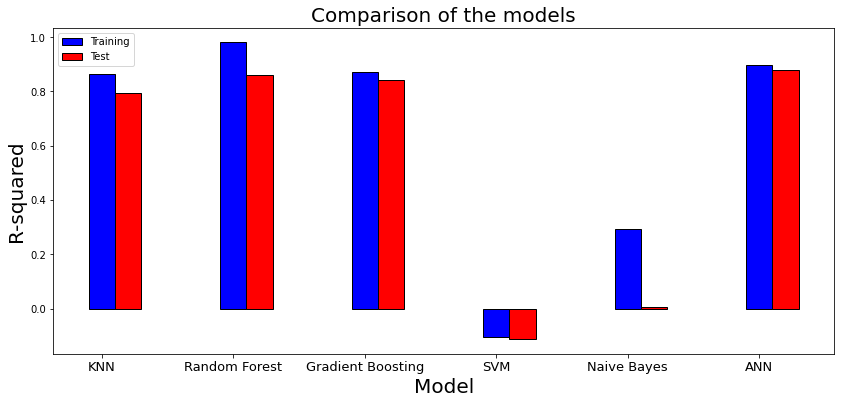

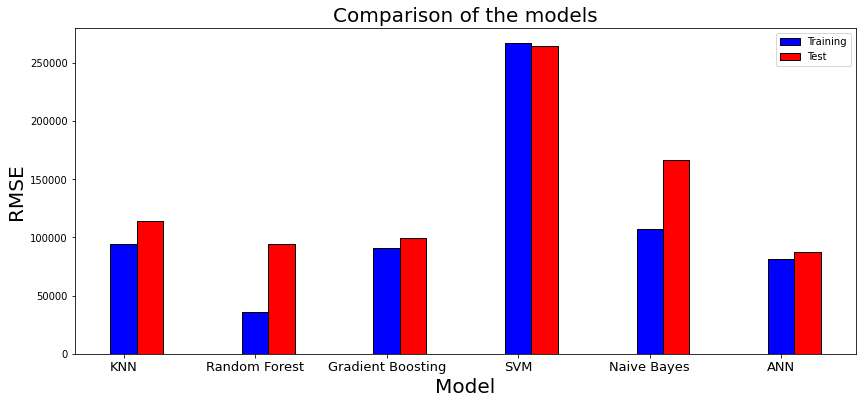

In [12]:
models = ['KNN', 'Random Forest', 'Gradient Boosting', 'SVM', 'Naive Bayes', 'ANN']
mean_R_squared = [knn_mean_r2, rf_mean_r2, gb_mean_r2, sv_mean_r2, nb_mean_r2, ann_mean_r2]
train_R_squared = [knn_r2_train, rf_r2_train, gb_r2_train, sv_r2_train, nb_r2_train, ann_r2_train]
test_R_squared = [knn_r2_test, rf_r2_test, gb_r2_test, sv_r2_test, nb_r2_test, ann_r2_test]
train_rmse = [knn_rmse_train, rf_rmse_train, gb_rmse_train, sv_rmse_train, nb_rmse_train,\
              ann_rmse_train]
test_rmse = [knn_rmse_test, rf_rmse_test, gb_rmse_test, sv_rmse_test, nb_rmse_test,\
              ann_rmse_test]

index=[1,2,3,4,5,6]
index_2=[1.2,2.2,3.2,4.2,5.2,6.2]

plt.figure(figsize=(14,6))
plt.bar(index,train_R_squared,color='blue', label='Training', edgecolor='k', width=0.2)
plt.bar(index_2,test_R_squared,color='red', label='Test', edgecolor='k', width=0.2)

plt.xlabel('Model',fontsize=20)
plt.ylabel ('R-squared',fontsize=20)
plt.title('Comparison of the models',fontsize=20)

plt.xticks([1,2,3,4,5,6], models, fontsize=13)
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.bar(index,train_rmse,color='blue', label='Training', edgecolor='k', width=0.2)
plt.bar(index_2,test_rmse,color='red', label='Test', edgecolor='k', width=0.2)

plt.xlabel('Model',fontsize=20)
plt.ylabel ('RMSE',fontsize=20)
plt.title('Comparison of the models',fontsize=20)

plt.xticks([1,2,3,4,5,6], models, fontsize=13)
plt.legend()
plt.show()

Based on the observed performances, Random Forest, Gradient Boosting and ANN models are selected for further testing and parameter tuning.

In [14]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 400, 800, 1200]
max_features = ['auto', 'sqrt']
max_depth = [10, 50, 100]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 5, 10]
bootstrap = [True, False]
random_grid_rf = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}

In [15]:
import timeit
tic = timeit.default_timer()
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf, n_iter = 100, \
                               cv = 4, verbose=0, random_state=42, n_jobs = -1)
rf_cv.fit(X_train, y_train['Sale Price'])
toc = timeit.default_timer()
print('Time elapsed in minutes:', (toc - tic)/60)

Time elapsed in minutes: 50.84424200555


In [17]:
rf_cv_rmse_train = mean_squared_error(y_train, rf_cv.predict(X_train), squared=False)
rf_cv_rmse_test = mean_squared_error(y_test, rf_cv.predict(X_test), squared=False)
rf_cv_r2_train = rf_cv.score(X_train, y_train)
rf_cv_r2_test = rf_cv.score(X_test, y_test)
print('RMSE for training set:', rf_cv_rmse_train)
print('RMSE for test set:', rf_cv_rmse_test)
print('R-squared for training set:', rf_cv_r2_train)
print('R-squared for test set:', rf_cv_r2_test)
print('Best parameters:', rf_cv.best_params_)

RMSE for training set: 41311.80682704651
RMSE for test set: 93845.19097168167
R-squared for training set: 0.9734805304007933
R-squared for test set: 0.8598400324909174
Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


In [18]:
loss = ['ls', 'lad', 'huber']
learning_rate = [0.01, 0.001]
n_estimators = [200, 400, 800, 1200]
max_features = ['auto', 'sqrt']
max_depth = [10, 50, 100]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 5, 10]
random_grid_gb = {'loss':loss,
                  'learning_rate': learning_rate,
                  'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}

In [19]:
tic = timeit.default_timer()
gb_cv = RandomizedSearchCV(estimator = gb, param_distributions = random_grid_gb, n_iter = 100, \
                               cv = 4, verbose=0, random_state=42, n_jobs = -1)
gb_cv.fit(X_train, y_train['Sale Price'])
toc = timeit.default_timer()
print('Time elapsed in minutes:', (toc - tic)/60)

Time elapsed in minutes: 181.7152211423667


In [20]:
gb_cv_rmse_train = mean_squared_error(y_train, gb_cv.predict(X_train), squared=False)
gb_cv_rmse_test = mean_squared_error(y_test, gb_cv.predict(X_test), squared=False)
gb_cv_r2_train = gb_cv.score(X_train, y_train)
gb_cv_r2_test = gb_cv.score(X_test, y_test)
print('RMSE for training set:', gb_cv_rmse_train)
print('RMSE for test set:', gb_cv_rmse_test)
print('R-squared for training set:', gb_cv_r2_train)
print('R-squared for test set:', gb_cv_r2_test)
print('Best parameters:', gb_cv.best_params_)

RMSE for training set: 59537.7226131002
RMSE for test set: 85358.26747225063
R-squared for training set: 0.9449191173829634
R-squared for test set: 0.884044560464949
Best parameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 50, 'loss': 'huber', 'learning_rate': 0.01}


In [21]:
units = [16, 32, 64]
activation = ['relu', 'sigmoid']
dropout_rate = [0.15, 0.25, 0.35]
optimizer = [tf.keras.optimizers.Adam, tf.keras.optimizers.RMSprop, tf.keras.optimizers.SGD]
learning_rate = [0.003, 0.001]
kernel_initializer = [tf.keras.initializers.random_uniform, tf.keras.initializers.random_normal]
random_grid_ann = {'units': units,
                   'activation': activation,
                   'dropout_rate': dropout_rate,
                   'optimizer': optimizer,
                   'learning_rate': learning_rate,
                   'kernel_initializer': kernel_initializer}

In [25]:
tic = timeit.default_timer()
ann_cv = RandomizedSearchCV(estimator = ann, param_distributions = random_grid_ann, n_iter = 100, \
                               cv = 4, verbose=0, random_state=42, n_jobs = -1, scoring=r2)
ann_cv.fit(X_train2, y_train2)
toc = timeit.default_timer()
print('Time elapsed in minutes:', (toc - tic)/60)

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line

Time elapsed in minutes: 56.27041636875001


In [26]:
ann_cv_rmse_train = mean_squared_error(y_train2, ann_cv.predict(X_train2), squared=False)
ann_cv_rmse_test = mean_squared_error(y_test2, ann_cv.predict(X_test2), squared=False)
ann_cv_r2_train = r2_score(y_train2, ann_cv.predict(X_train2))
ann_cv_r2_test = r2_score(y_test2, ann_cv.predict(X_test2))
print('RMSE for training set:', ann_cv_rmse_train)
print('RMSE for test set:', ann_cv_rmse_test)
print('R-squared for training set:', ann_cv_r2_train)
print('R-squared for test set:', ann_cv_r2_test)
print('Best parameters:', ann_cv.best_params_)

RMSE for training set: 80783.94
RMSE for test set: 86977.52
R-squared for training set: 0.898593332116351
R-squared for test set: 0.8796034495369744
Best parameters: {'units': 64, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.001, 'kernel_initializer': <class 'tensorflow.python.keras.initializers.initializers_v2.RandomNormal'>, 'dropout_rate': 0.25, 'activation': 'relu'}


We visually compare the performance of the three optimal models, and then check the feature importances for the optimal Random Forest and Gradient Boosting models.

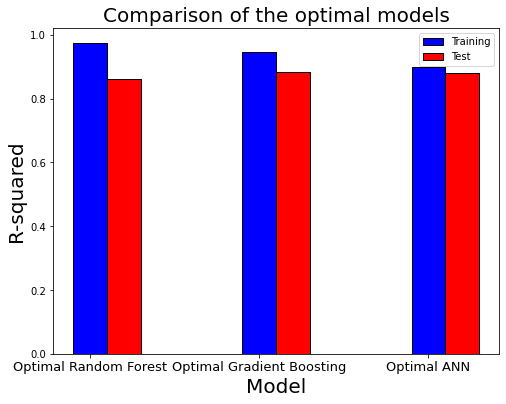

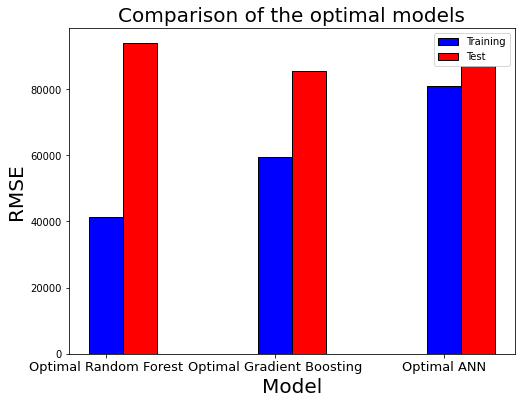

In [27]:
models = ['Optimal Random Forest', 'Optimal Gradient Boosting', 'Optimal ANN']
train_R_squared = [rf_cv_r2_train, gb_cv_r2_train, ann_cv_r2_train]
test_R_squared = [rf_cv_r2_test, gb_cv_r2_test, ann_cv_r2_test]
train_rmse = [rf_cv_rmse_train, gb_cv_rmse_train, ann_cv_rmse_train]
test_rmse = [rf_cv_rmse_test, gb_cv_rmse_test, ann_cv_rmse_test]

index=[1,2,3]
index_2=[1.2,2.2,3.2]

plt.figure(figsize=(8,6))
plt.bar(index,train_R_squared,color='blue', label='Training', edgecolor='k', width=0.2)
plt.bar(index_2,test_R_squared,color='red', label='Test', edgecolor='k', width=0.2)

plt.xlabel('Model',fontsize=20)
plt.ylabel ('R-squared',fontsize=20)
plt.title('Comparison of the optimal models',fontsize=20)

plt.xticks([1,2,3], models, fontsize=13)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.bar(index,train_rmse,color='blue', label='Training', edgecolor='k', width=0.2)
plt.bar(index_2,test_rmse,color='red', label='Test', edgecolor='k', width=0.2)

plt.xlabel('Model',fontsize=20)
plt.ylabel ('RMSE',fontsize=20)
plt.title('Comparison of the optimal models',fontsize=20)

plt.xticks([1,2,3], models, fontsize=13)
plt.legend()
plt.show()

In [28]:
rf_optimal = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=1,\
                                   max_features= 'auto', max_depth= 50, bootstrap= True)
rf_optimal.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_split=5, n_estimators=400)

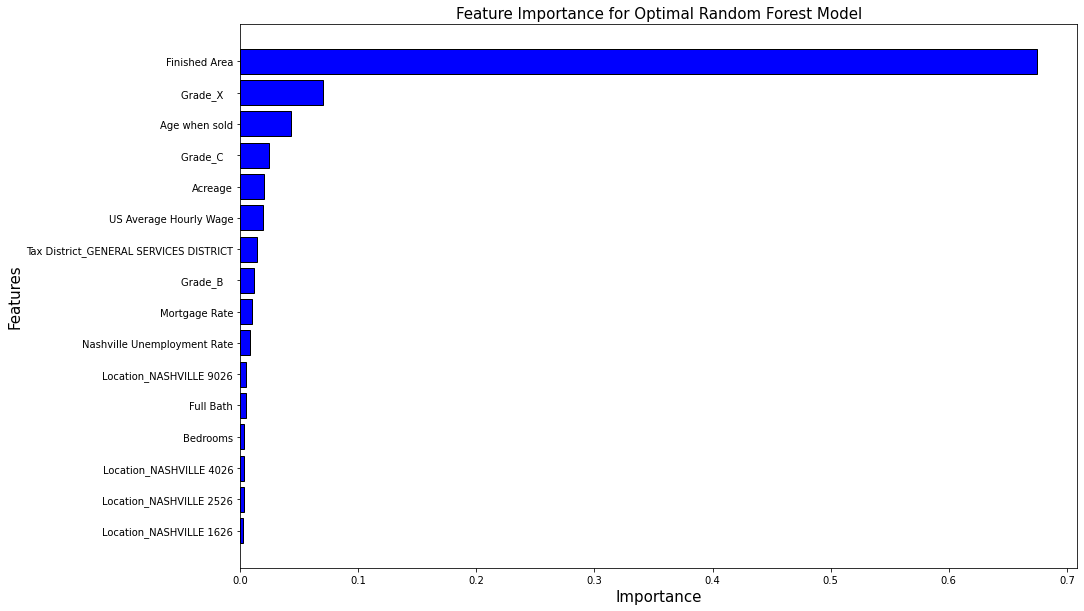

In [29]:
table = pd.DataFrame({'Features':X_train.columns, 'Importance':rf_optimal.feature_importances_}).\
                                             sort_values('Importance', ascending=False)
feature_importance = np.flip(table['Importance'][:16])
features = np.flip(table['Features'][:16])
plt.figure(figsize=(15,10))
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.barh(index, feature_importance, align='center', color='blue', edgecolor='k')
plt.xlabel('Importance', fontsize = 15)
plt.yticks(index, features)
plt.ylabel('Features', fontsize = 15)
plt.title('Feature Importance for Optimal Random Forest Model', fontsize=15)
plt.show()

In [30]:
gb_optimal = GradientBoostingRegressor(n_estimators=1200, min_samples_split=5, min_samples_leaf=10,\
                                       max_features= 'sqrt', max_depth= 50, loss= 'huber', learning_rate= 0.01)
gb_optimal.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=50,
                          max_features='sqrt', min_samples_leaf=10,
                          min_samples_split=5, n_estimators=1200)

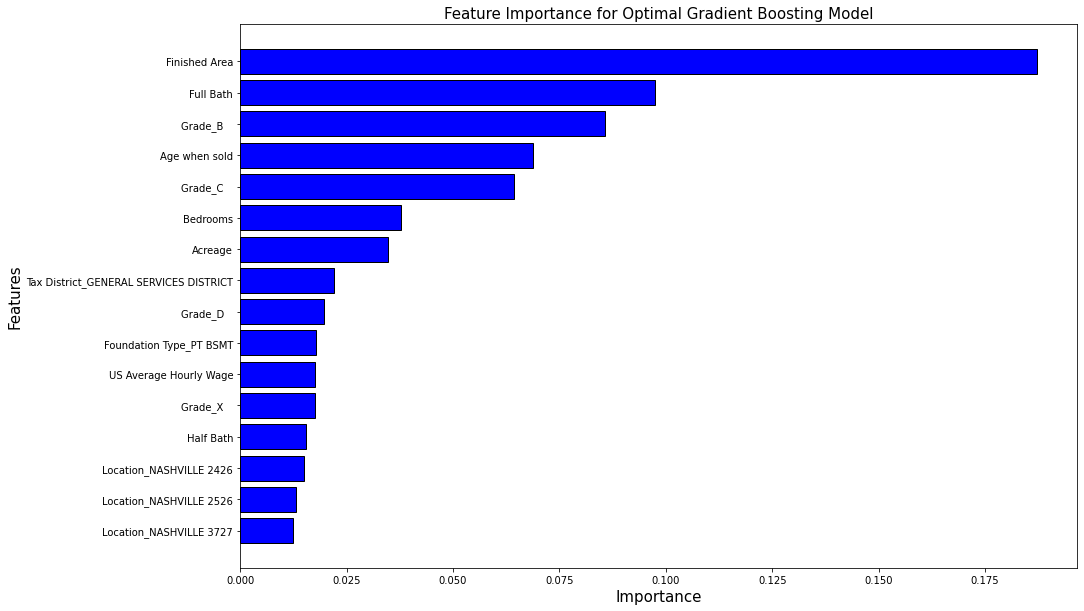

In [31]:
table = pd.DataFrame({'Features':X_train.columns, 'Importance':gb_optimal.feature_importances_}).\
                                             sort_values('Importance', ascending=False)
feature_importance = np.flip(table['Importance'][:16])
features = np.flip(table['Features'][:16])
plt.figure(figsize=(15,10))
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.barh(index, feature_importance, align='center', color='blue', edgecolor='k')
plt.xlabel('Importance', fontsize = 15)
plt.yticks(index, features)
plt.ylabel('Features', fontsize = 15)
plt.title('Feature Importance for Optimal Gradient Boosting Model', fontsize=15)
plt.show()

While the random forest model has the best performance on the training set, we observe that the gradient boosting and the neural network models outperform the random forest model on the test set. The gradient boosting model performs slightly better than the neural network model with respect to both RMSE and R-sauqred on both the training and test sets. The gradient boosting model also shows less dependence on Finished Area comapred to the random forest model which is hugely dependent on Finished Area.